 # Global Super Store Data Analysis

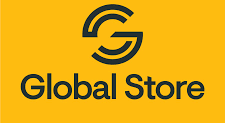

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
import datetime
sns.set_style("darkgrid")

**Importing the data set**

In [2]:
df=pd.read_csv(r"C:\Users\nirmi\OneDrive\Desktop\ALL\EXCEL FILES\Global-Superstore.csv",encoding= 'unicode_escape')

In [3]:
pd.set_option('float_format', '{:.2f}'.format)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,02-05-2013,02-07-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,11-05-2013,11-06-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,6/19/2014,6/19/2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.00,4.50,0.01,Medium
51286,35398,US-2014-102288,6/20/2014,6/24/2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.44,1,0.80,-1.11,0.01,Medium
51287,40470,US-2013-155768,12-02-2013,12-02-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1-8"" x 9 1-2"" Security-Tint Envelopes",22.92,3,0.00,11.23,0.01,High
51288,9596,MX-2012-140767,2/18/2012,2/22/2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,So Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.00,2.40,0.00,Medium


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,02-05-2013,02-07-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,11-05-2013,11-06-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.04,Critical


In [5]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,6/19/2014,6/19/2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.00,4.50,0.01,Medium
51286,35398,US-2014-102288,6/20/2014,6/24/2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.44,1,0.80,-1.11,0.01,Medium
51287,40470,US-2013-155768,12-02-2013,12-02-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1-8"" x 9 1-2"" Security-Tint Envelopes",22.92,3,0.00,11.23,0.01,High
51288,9596,MX-2012-140767,2/18/2012,2/22/2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,So Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.00,2.40,0.00,Medium
51289,6147,MX-2012-134460,5/22/2012,5/26/2012,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.38,3,0.00,1.80,0.00,High


In [6]:
df.shape

(51290, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     51290 non-null  int64  
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [8]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [9]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         632
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             20049
Quantity             14
Discount             23
Profit            16578
Shipping Cost     10037
Order Priority        4
dtype: int64

In [10]:
df[['Order Date','Ship Date']] = df[['Order Date','Ship Date']].replace({'-':'/'}, regex=True)

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [12]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [13]:
df['Year'] = df['Order Date'].dt.year 
df['Month'] = df['Order Date'].dt.month 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     51290 non-null  int64         
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Year', 'Month'],
      dtype='object')

**Notes**
- Number of days from(shipdate - orderdate)
- shipment mode
- order id unique?
- group by customer id
- segment category subcategory
- country state city
- discount profit shipping cost

In [16]:
df['TotatDays']=df['Ship Date']-df['Order Date']

In [17]:
df['TotatDays'] = df['TotatDays'].dt.days.astype('int16')

In [18]:
df['TotatDays']

0        0
1        2
2        1
3        2
4        1
        ..
51285    0
51286    4
51287    0
51288    4
51289    4
Name: TotatDays, Length: 51290, dtype: int16

In [19]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Year,Month,TotatDays
count,51290.00,51290,51290,51290.00,51290.00,51290.00,51290.00,51290.00,51290.00,51290.00,51290.00,51290.00
mean,25645.50,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,29655.64,246.49,3.48,0.14,28.61,26.38,2012.78,7.52,3.97
min,1.00,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.00,0.44,1.00,0.00,-6599.98,0.00,2011.00,1.00,0.00
25%,12823.25,2012-06-19 00:00:00,2012-06-23 00:00:00,23476.00,30.76,2.00,0.00,0.00,2.61,2012.00,5.00,3.00
50%,25645.50,2013-07-08 00:00:00,2013-07-12 00:00:00,23476.00,85.06,3.00,0.00,9.24,7.79,2013.00,8.00,4.00
75%,38467.75,2014-05-22 00:00:00,2014-05-26 00:00:00,23476.00,251.06,5.00,0.20,36.81,24.45,2014.00,10.00,5.00
max,51290.00,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.00,22638.48,14.00,0.85,8399.98,933.57,2014.00,12.00,7.00
std,14806.29,NaN,NaN,18923.71,487.57,2.28,0.21,174.34,57.30,1.10,3.30,1.73


# Exploratory Data Analysis

In [20]:
df['Order Date'].min()

Timestamp('2011-01-01 00:00:00')

In [21]:
df['Order Date'].max()

Timestamp('2014-12-31 00:00:00')

In [22]:
df['Ship Date'].min()

Timestamp('2011-01-03 00:00:00')

In [23]:
df['Ship Date'].max()

Timestamp('2015-01-07 00:00:00')

**The dataset contains data from 2011 to 7 Jan 2015**

In [24]:
df['Profit'].sum()

1467456.5500000003

In [25]:
df['Profit'].max()

8399.98

In [26]:
df['Profit'].min()

-6599.98

In [27]:
df['Quantity'].sum()

178312

In [28]:
df['Quantity'].max()

14

In [29]:
df['Quantity'].min()

1

In [30]:
df['Sales'].sum()

12642507.25

In [31]:
df['Sales'].min()

0.44

In [32]:
df['Sales'].max()

22638.48

# TOTAL SALES OF EACH YEAR

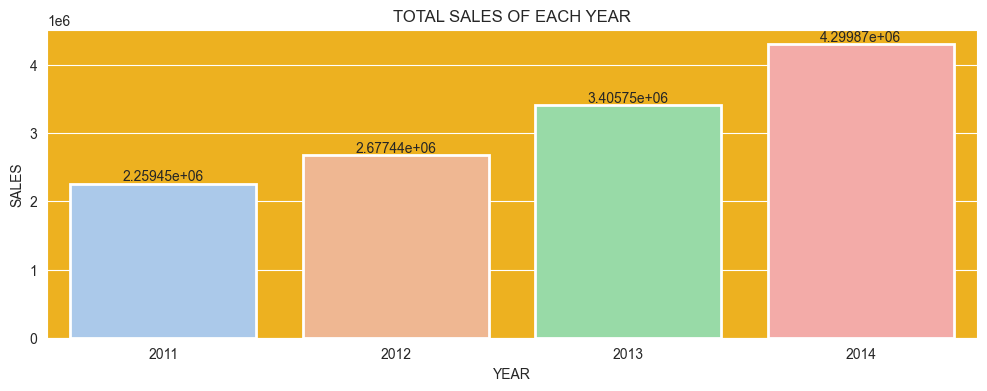

In [33]:
ds=df.groupby(['Year'],as_index=False)['Sales'].sum()
ds
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Year',y='Sales',data=ds,palette="pastel",linewidth=2)
for bars in ax.containers:ax.bar_label(bars) 
ax.set(ylabel='SALES', xlabel='YEAR')
plt.title("TOTAL SALES OF EACH YEAR")
ax.set_facecolor("#EDB120")

# TOTAL QUANTITY OF PRODUCT SOLD EACH YEAR

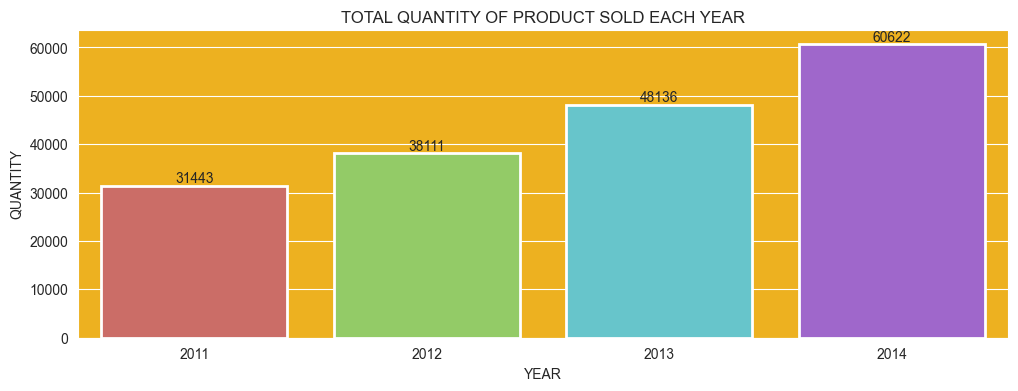

In [34]:
ds=df.groupby(['Year'],as_index=False)['Quantity'].sum()
ds
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Year',y='Quantity',data=ds,palette="hls",linewidth=2)
for bars in ax.containers:ax.bar_label(bars) 
ax.set(ylabel='QUANTITY', xlabel='YEAR')
plt.title("TOTAL QUANTITY OF PRODUCT SOLD EACH YEAR")
ax.set_facecolor("#EDB120")

# TOTAL PROFIT EARNED EACH YEAR

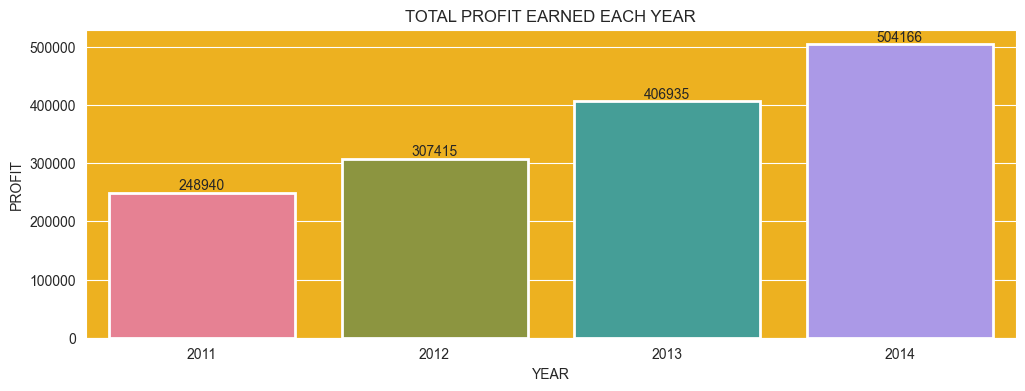

In [35]:
ds=df.groupby(['Year'],as_index=False)['Profit'].sum()
ds
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Year',y='Profit',data=ds,palette="husl",linewidth=2)
for bars in ax.containers:ax.bar_label(bars) 
ax.set(ylabel='PROFIT', xlabel='YEAR')
plt.title("TOTAL PROFIT EARNED EACH YEAR")
ax.set_facecolor("#EDB120")

# MONTHLY SALES OF EACH YEAR

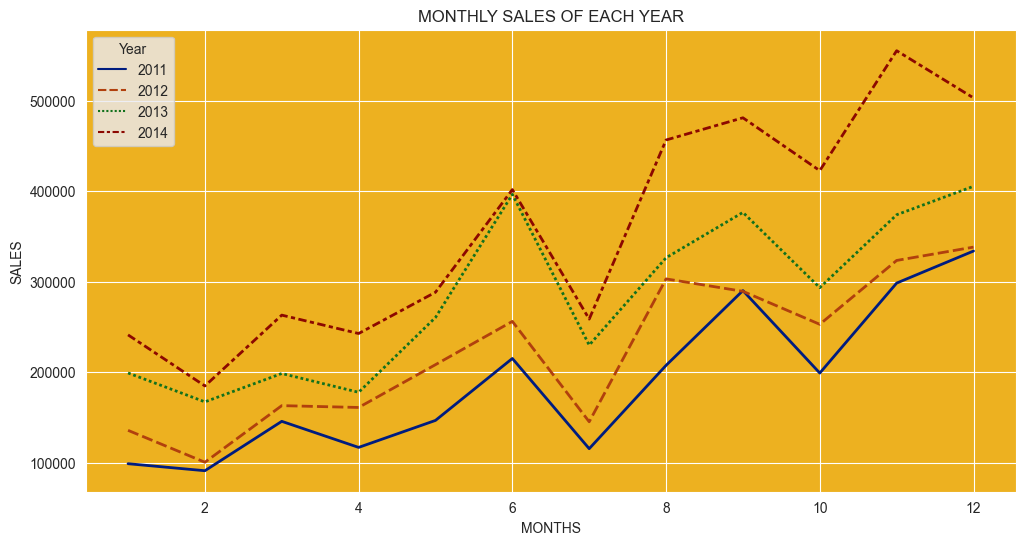

In [36]:
ds=df.groupby(['Month','Year'],as_index=False)['Sales'].sum()
ds
plt.figure(figsize=(12,6))
ax=sns.lineplot(x='Month',y='Sales',hue='Year',data=ds,style="Year",linewidth=2,palette="dark")
for bars in ax.containers:ax.bar_label(bars) 
ax.set(ylabel='SALES', xlabel='MONTHS')
plt.title("MONTHLY SALES OF EACH YEAR")
ax.set_facecolor("#EDB120")

# MONTHLY PROFIT OF EACH YEAR

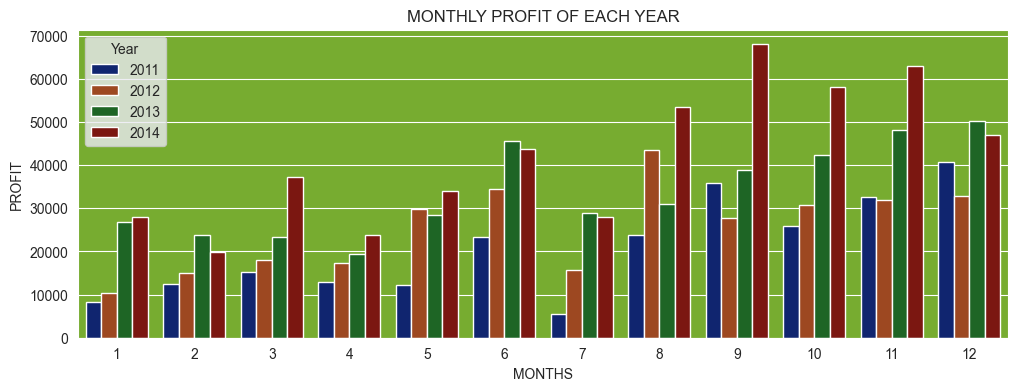

In [37]:
ds=df.groupby(['Month','Year'],as_index=False)['Profit'].sum()
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Month',y='Profit',hue='Year',data=ds,palette="dark")
ax.set(ylabel='PROFIT', xlabel='MONTHS')
plt.title("MONTHLY PROFIT OF EACH YEAR")
ax.set_facecolor("#77AC30")

# MONTHLY QUANTITY OF PRODUCT SOLD EACH YEAR

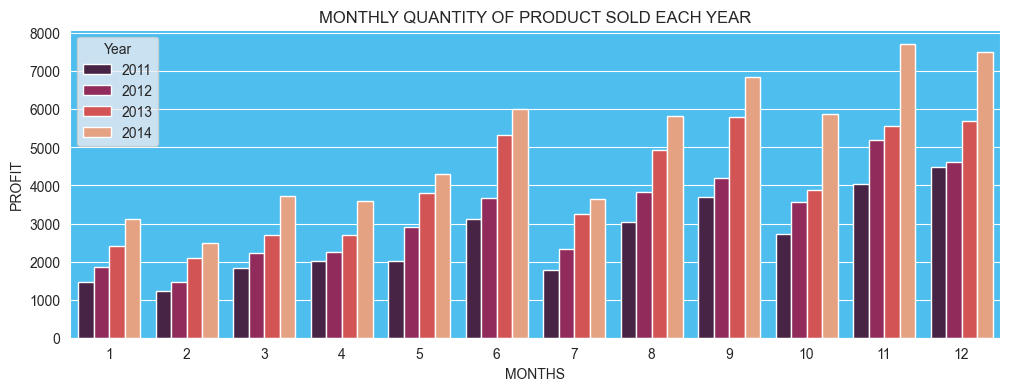

In [38]:
ds=df.groupby(['Month','Year'],as_index=False)['Quantity'].sum()
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Month',y='Quantity',hue='Year',data=ds,palette="rocket")
ax.set(ylabel='PROFIT', xlabel='MONTHS')
plt.title("MONTHLY QUANTITY OF PRODUCT SOLD EACH YEAR")
ax.set_facecolor("#4DBEEE")

# SHIPMENT MODES

Text(0.5, 1.0, 'SHIPMENT MODES')

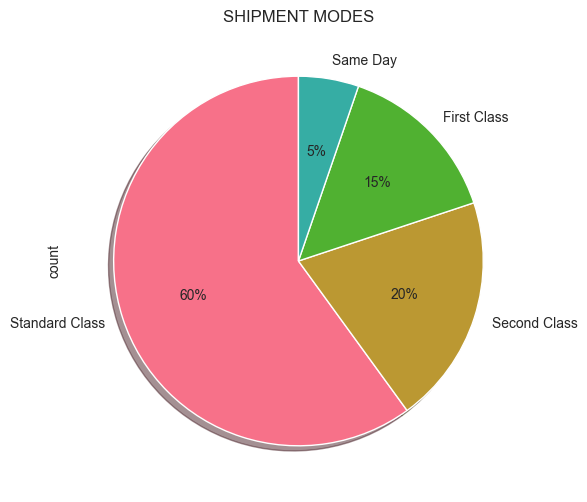

In [39]:
ds=df['Ship Mode'].value_counts()
ds.plot.pie(autopct='%.0f%%',subplots=True, figsize=(11, 6),shadow=True, startangle=90,colors=sns.color_palette("husl"))
plt.title("SHIPMENT MODES")

# REGIONS

Text(0.5, 1.0, 'REGIONS')

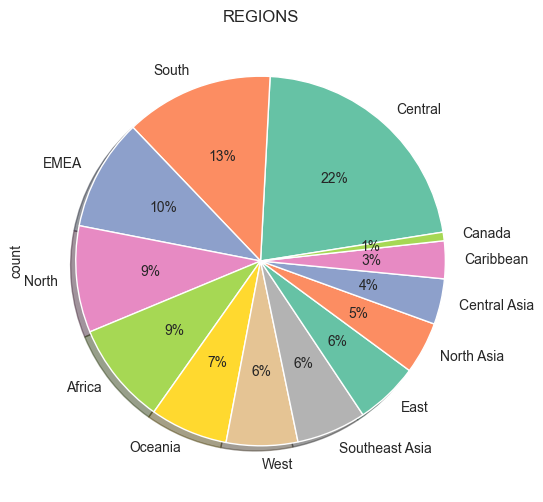

In [40]:
ds=df['Region'].value_counts()
ds.plot.pie(autopct='%.0f%%',subplots=True, figsize=(11, 6),shadow=True, startangle=9,colors=sns.color_palette('Set2'))
plt.title("REGIONS")

# CATEGORY OF PRODUCTS

Text(0.5, 1.0, 'CATEGORY OF PRODUCTS')

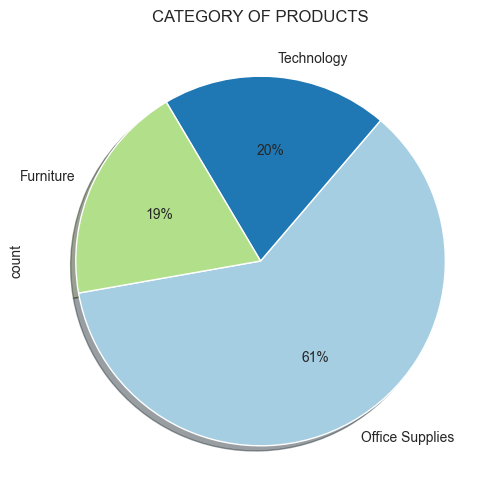

In [41]:
ds=df['Category'].value_counts()
ds.plot.pie(autopct='%.0f%%',subplots=True, figsize=(11, 6),shadow=True, startangle=190,colors=sns.color_palette("Paired"))
plt.title("CATEGORY OF PRODUCTS")

# Priority of Orders

Text(0.5, 1.0, 'ORDER PRIORITY')

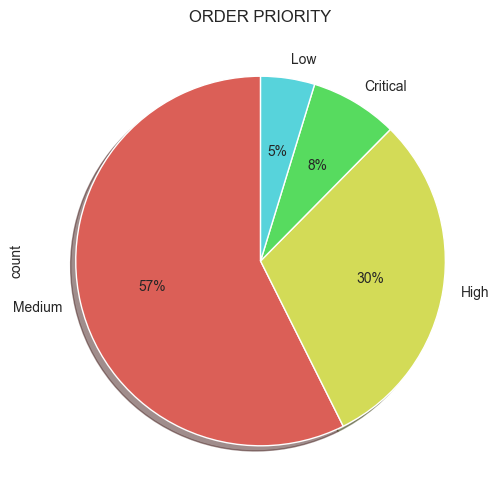

In [42]:
ds=df['Order Priority'].value_counts()
ds.plot.pie(autopct='%.0f%%',subplots=True, figsize=(11, 6),shadow=True, startangle=90,colors=sns.color_palette("hls"))
plt.title("ORDER PRIORITY")

# ORDER SEGMENT

Text(0.5, 1.0, 'SEGMENT WISE ORDER COUNT')

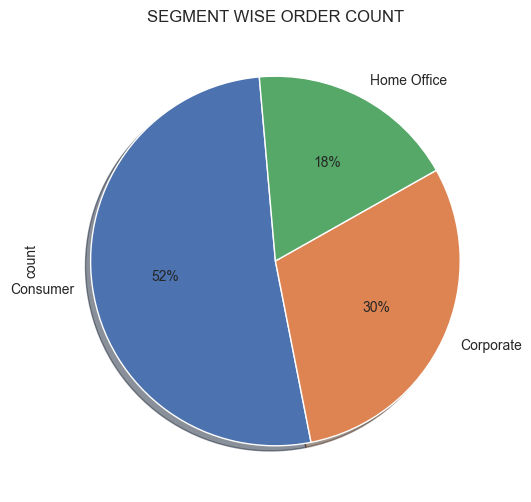

In [43]:
ds=df['Segment'].value_counts()
ds.plot.pie(autopct='%.0f%%',subplots=True, figsize=(11, 6),shadow=True, startangle=95,colors=sns.color_palette("deep"))
plt.title("SEGMENT WISE ORDER COUNT")

# TOP 10 COUNTRY (SALES - QUANTITY ORDERED - PROFIT)

[None, None, None, None, None, None, None, None, None, None]

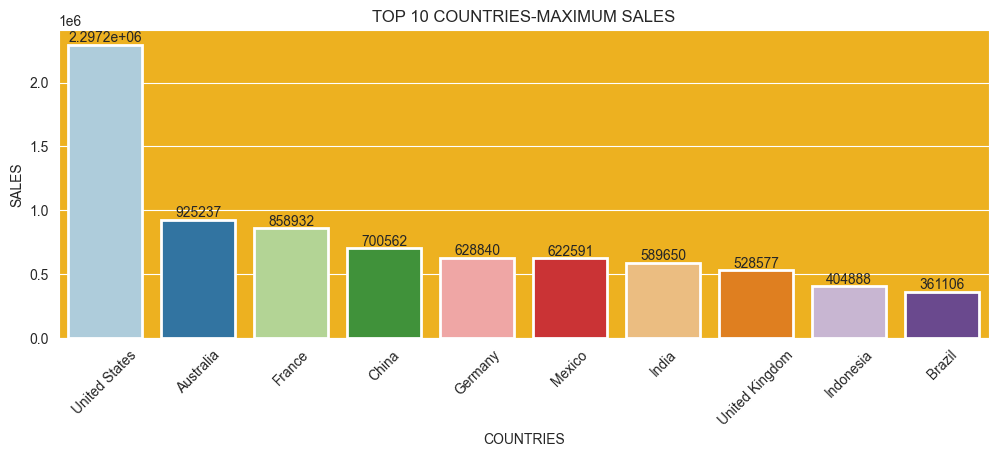

In [44]:
ds=df.groupby(['Country'],as_index=False)['Sales'].sum()
ds=ds.nlargest(10,'Sales', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Country',y='Sales',data=ds,palette="Paired")
ax.set(ylabel='SALES', xlabel='COUNTRIES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 10 COUNTRIES-MAXIMUM SALES")
ax.set_facecolor("#EDB120")
plt.setp(ax.patches,linewidth=2)

[None, None, None, None, None, None, None, None, None, None]

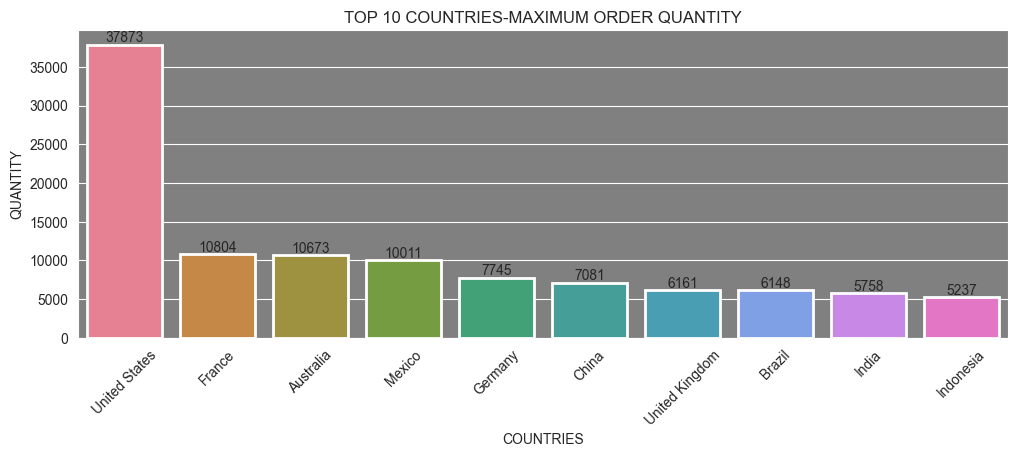

In [45]:
ds=df.groupby(['Country'],as_index=False)['Quantity'].sum()
ds=ds.nlargest(10,'Quantity', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Country',y='Quantity',data=ds,palette="husl")
ax.set(ylabel='QUANTITY', xlabel='COUNTRIES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 10 COUNTRIES-MAXIMUM ORDER QUANTITY")
ax.set_facecolor("GREY")
plt.setp(ax.patches,linewidth=2)

[None, None, None, None, None, None, None, None, None, None]

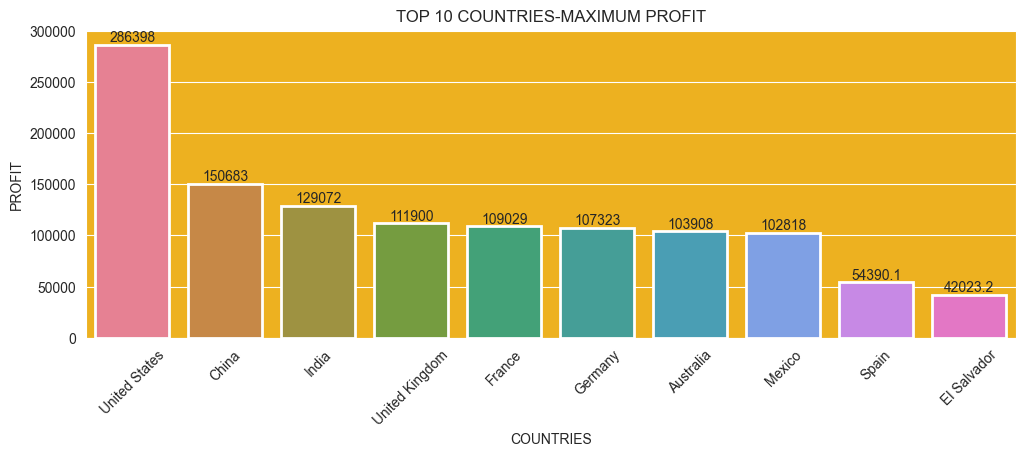

In [46]:
ds=df.groupby(['Country'],as_index=False)['Profit'].sum()
ds=ds.nlargest(10,'Profit', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Country',y='Profit',data=ds,palette="husl")
ax.set(ylabel='PROFIT', xlabel='COUNTRIES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 10 COUNTRIES-MAXIMUM PROFIT")
ax.set_facecolor("#EDB120")
plt.setp(ax.patches,linewidth=2)

# TOP STATES (SALES - QUANTITY ORDERED - PROFIT)

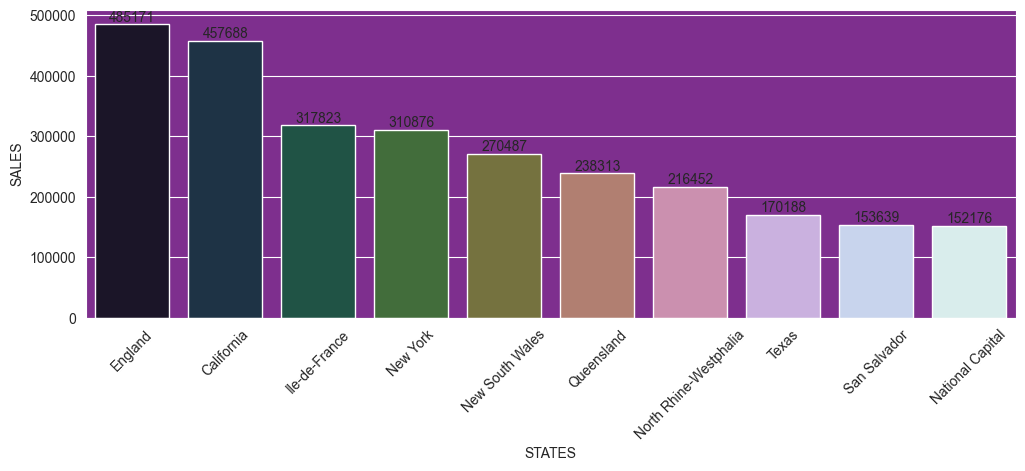

In [47]:
ds=df.groupby(['State'],as_index=False)['Sales'].sum()
ds=ds.nlargest(10,'Sales', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='State',y='Sales',data=ds,palette="cubehelix")
ax.set(ylabel='SALES', xlabel='STATES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
ax.set_facecolor("#7E2F8E")

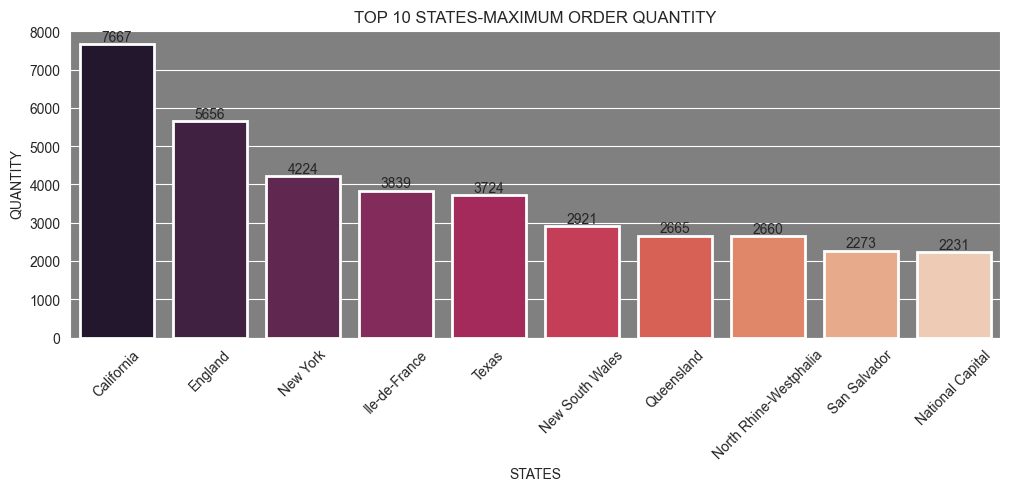

In [48]:
ds=df.groupby(['State'],as_index=False)['Quantity'].sum()
ds=ds.nlargest(10,'Quantity', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='State',y='Quantity',data=ds,palette="rocket",linewidth=2)
ax.set(ylabel='QUANTITY', xlabel='STATES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 10 STATES-MAXIMUM ORDER QUANTITY")
ax.set_facecolor("GREY")

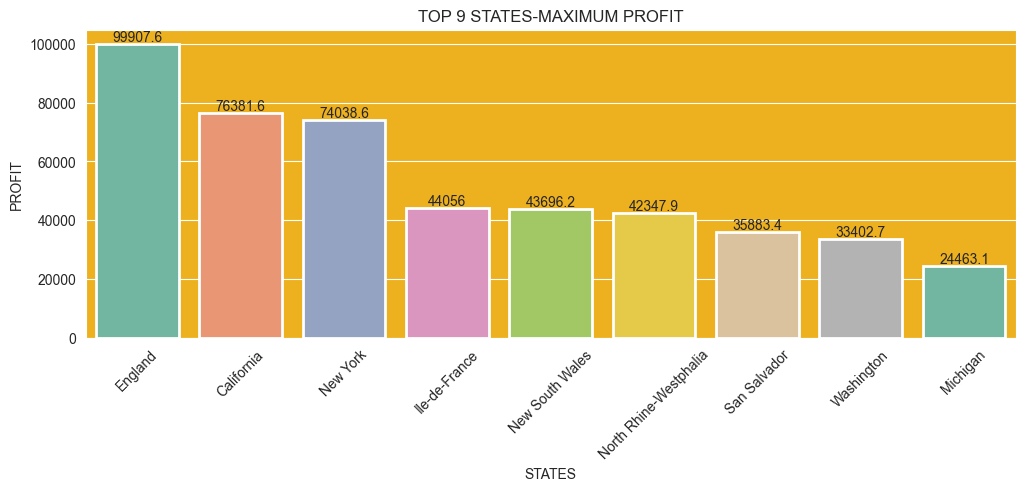

In [49]:
ds=df.groupby(['State'],as_index=False)['Profit'].sum()
ds=ds.nlargest(9,'Profit', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='State',y='Profit',data=ds,palette="Set2",linewidth=2)
ax.set(ylabel='PROFIT', xlabel='STATES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 9 STATES-MAXIMUM PROFIT")
ax.set_facecolor("#EDB120")

# TOP 10 CITY (SALES - QUANTITY ORDERED - PROFIT)

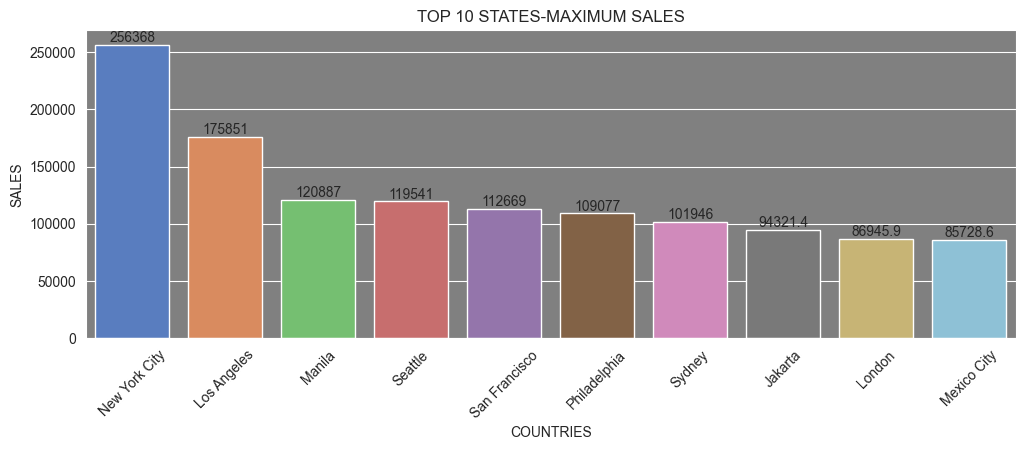

In [50]:
ds=df.groupby(['City'],as_index=False)['Sales'].sum()
ds=ds.nlargest(10,'Sales', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='City',y='Sales',data=ds,palette="muted")
ax.set(ylabel='SALES', xlabel='COUNTRIES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 10 STATES-MAXIMUM SALES")
ax.set_facecolor("GREY")

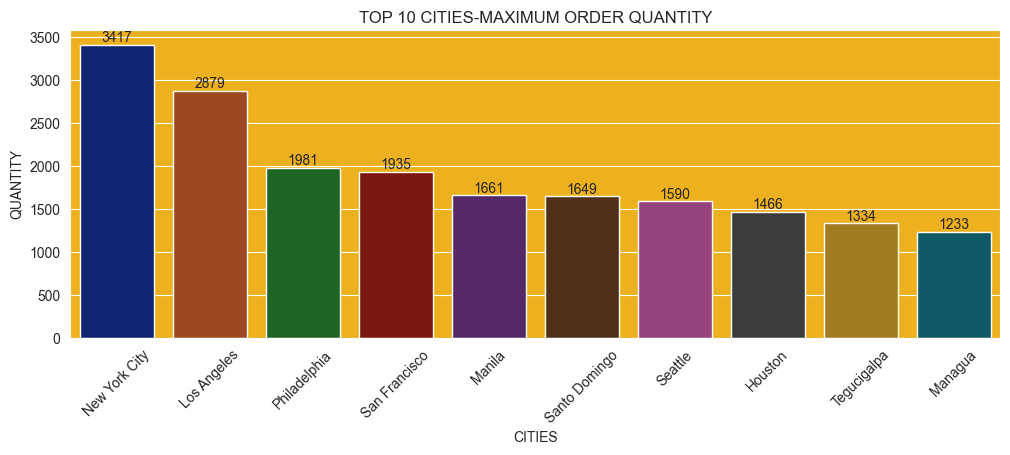

In [51]:
ds=df.groupby(['City'],as_index=False)['Quantity'].sum()
ds=ds.nlargest(10,'Quantity', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='City',y='Quantity',data=ds,palette="dark")
ax.set(ylabel='QUANTITY', xlabel='CITIES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 10 CITIES-MAXIMUM ORDER QUANTITY")
ax.set_facecolor("#EDB120")

[None, None, None, None, None, None, None, None, None, None]

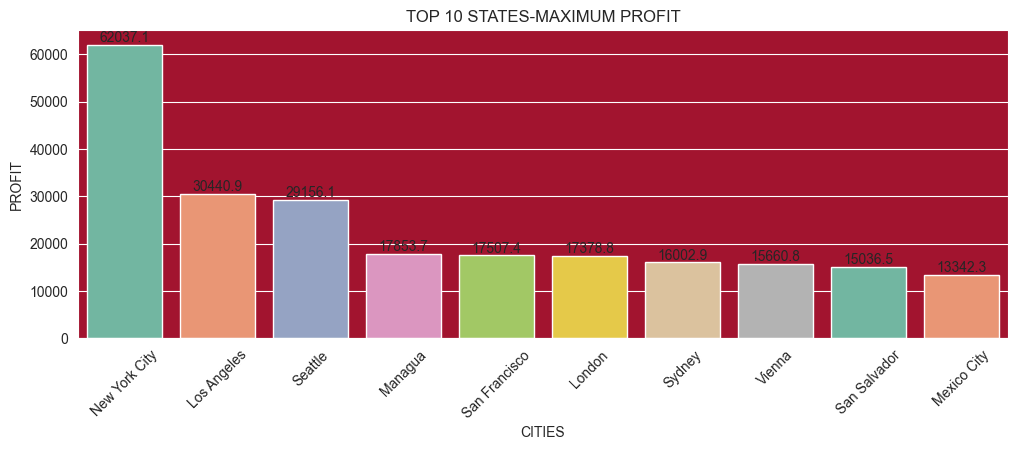

In [52]:
ds=df.groupby(['City'],as_index=False)['Profit'].sum()
ds=ds.nlargest(10,'Profit', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='City',y='Profit',data=ds,palette="Set2")
ax.set(ylabel='PROFIT', xlabel='CITIES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 10 STATES-MAXIMUM PROFIT")
ax.set_facecolor("#A2142F")
plt.setp(ax.patches,linewidth=1)

# TOP 10 MOST SOLD PRODUCTS - QUANTITY

[None, None, None, None, None, None, None, None, None, None]

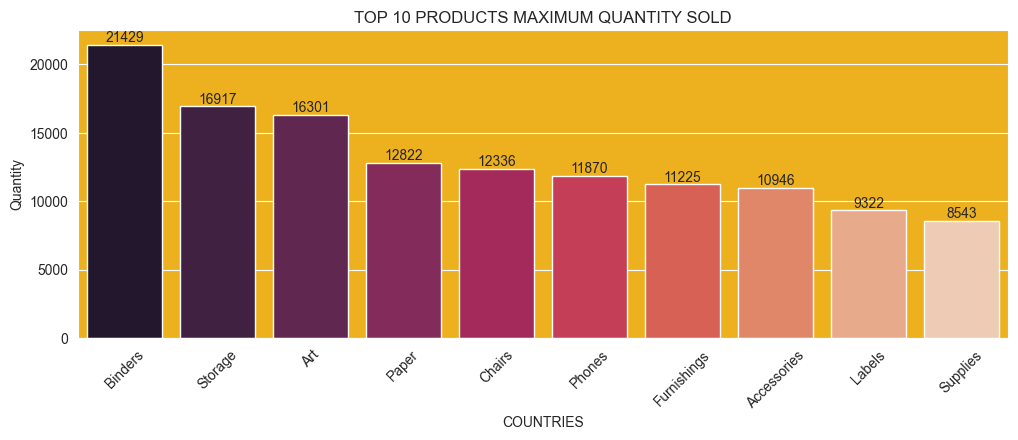

In [53]:
ds=df.groupby(['Sub-Category'],as_index=False)['Quantity'].sum()
ds=ds.nlargest(10,'Quantity', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Sub-Category',y='Quantity',data=ds,palette="rocket")
ax.set(ylabel='Quantity', xlabel='COUNTRIES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 10 PRODUCTS MAXIMUM QUANTITY SOLD")
ax.set_facecolor("#EDB120")
plt.setp(ax.patches,linewidth=1)

# TOP 10 MOST SOLD PRODUCTS - PROFIT

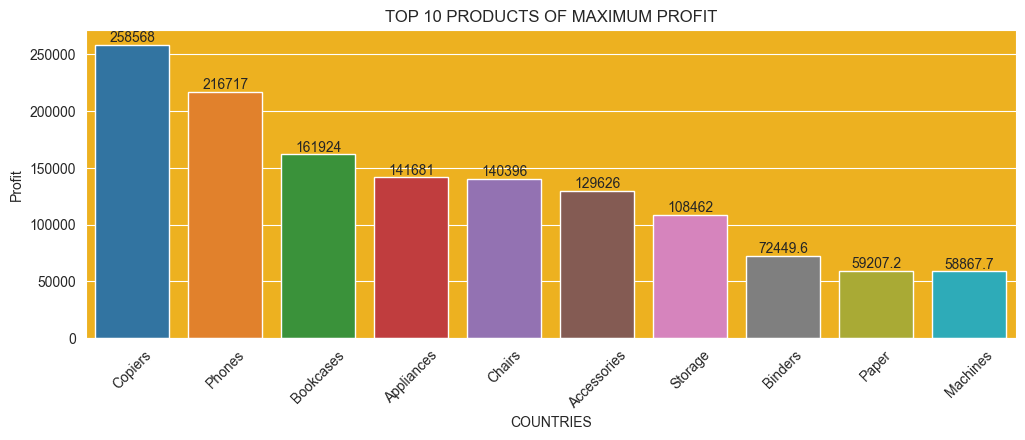

In [54]:
ds=df.groupby(['Sub-Category'],as_index=False)['Profit'].sum()
ds=ds.nlargest(10,'Profit', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Sub-Category',y='Profit',data=ds,palette="tab10")
ax.set(ylabel='Profit', xlabel='COUNTRIES')
for bars in ax.containers:ax.bar_label(bars)
plt.xticks(rotation=45)
plt.title("TOP 10 PRODUCTS OF MAXIMUM PROFIT")
ax.set_facecolor("#EDB120")

# TOP 10 CUSTOMERS NAME - 2011

**MAXIMUM SALES**

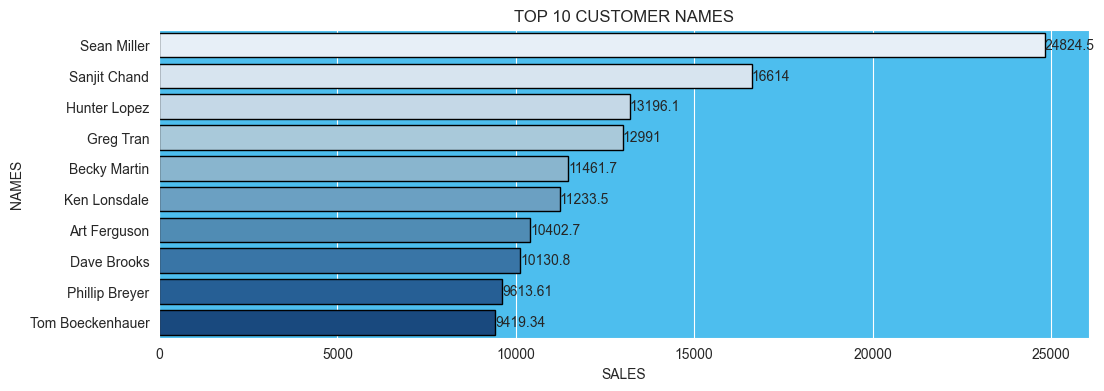

In [55]:
d=df[['Customer ID','Customer Name','Sales']][df['Year']==2011]
ds=d.groupby(['Customer ID','Customer Name'],as_index=False)['Sales'].sum()
ds=ds.nlargest(10,'Sales', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Sales',y='Customer Name',data=ds,palette="Blues",edgecolor="black")
ax.set(ylabel='NAMES', xlabel='SALES')
for bars in ax.containers:ax.bar_label(bars)
plt.title("TOP 10 CUSTOMER NAMES")
ax.set_facecolor("#4DBEEE")

**MAXIMUM QUANTITY**

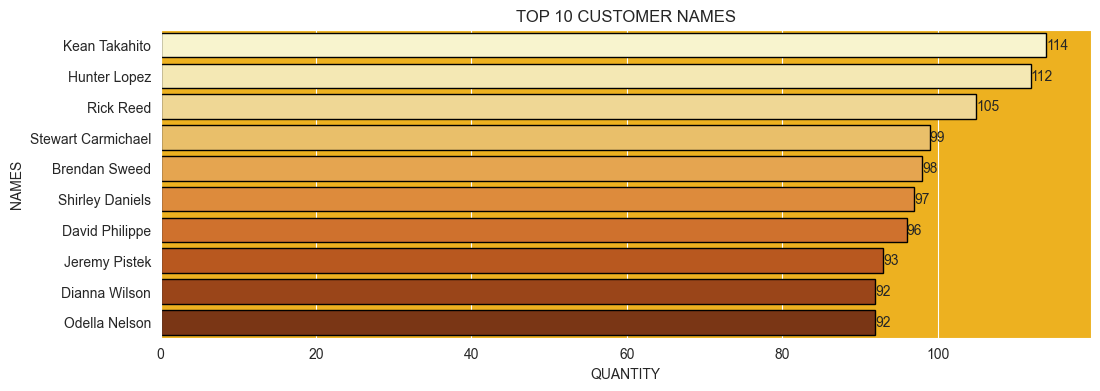

In [56]:
d=df[['Customer ID','Customer Name','Quantity']][df['Year']==2011]
ds=d.groupby(['Customer ID','Customer Name'],as_index=False)['Quantity'].sum()
ds=ds.nlargest(10,'Quantity', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Quantity',y='Customer Name',data=ds,palette="YlOrBr",edgecolor="black")
ax.set(ylabel='NAMES', xlabel='QUANTITY')
for bars in ax.containers:ax.bar_label(bars)
plt.title("TOP 10 CUSTOMER NAMES")
ax.set_facecolor("#EDB120")

# TOP 10 CUSTOMERS NAME - 2012

**MAXIMUM SALES**

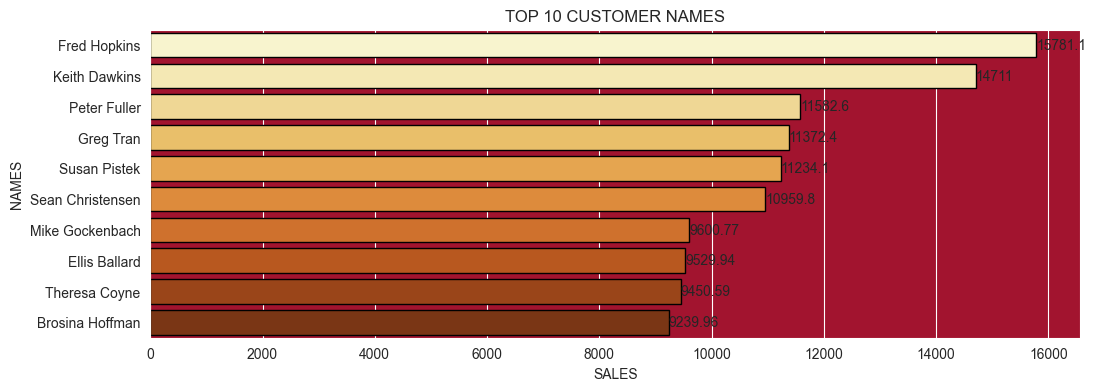

In [57]:
d=df[['Customer ID','Customer Name','Sales']][df['Year']==2012]
ds=d.groupby(['Customer ID','Customer Name'],as_index=False)['Sales'].sum()
ds=ds.nlargest(10,'Sales', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Sales',y='Customer Name',data=ds,palette="YlOrBr",edgecolor="black")
ax.set(ylabel='NAMES', xlabel='SALES')
for bars in ax.containers:ax.bar_label(bars)
plt.title("TOP 10 CUSTOMER NAMES")
ax.set_facecolor("#A2142F")

**MAXIMUM QUANTITY**

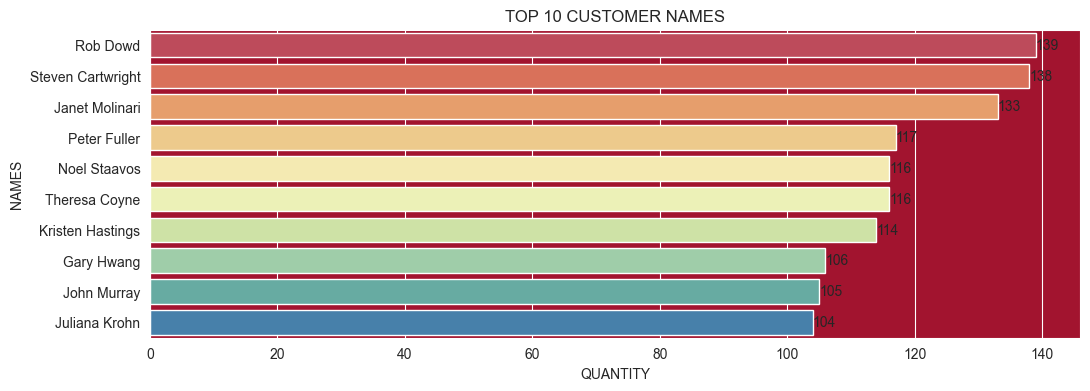

In [58]:
d=df[['Customer ID','Customer Name','Quantity']][df['Year']==2012]
ds=d.groupby(['Customer ID','Customer Name'],as_index=False)['Quantity'].sum()
ds=ds.nlargest(10,'Quantity', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Quantity',y='Customer Name',data=ds,palette="Spectral")
ax.set(ylabel='NAMES', xlabel='QUANTITY')
for bars in ax.containers:ax.bar_label(bars)
plt.title("TOP 10 CUSTOMER NAMES")
ax.set_facecolor("#A2142F")

# TOP 10 CUSTOMERS NAME - 2013

**MAXIMUM SALES**

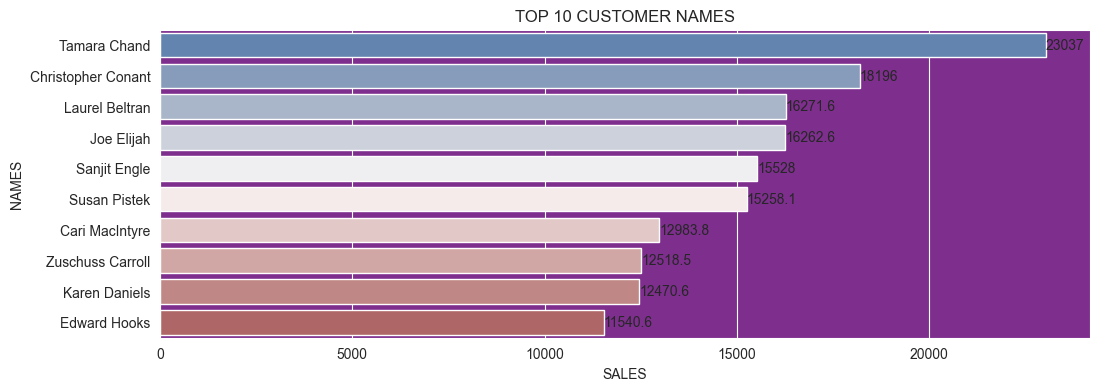

In [59]:
d=df[['Customer ID','Customer Name','Sales']][df['Year']==2013]
ds=d.groupby(['Customer ID','Customer Name'],as_index=False)['Sales'].sum()
ds=ds.nlargest(10,'Sales', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Sales',y='Customer Name',data=ds,palette="vlag",)
ax.set(ylabel='NAMES', xlabel='SALES')
for bars in ax.containers:ax.bar_label(bars)
plt.title("TOP 10 CUSTOMER NAMES")
ax.set_facecolor("#7E2F8E")

**MAXIMUM QUANTITY**

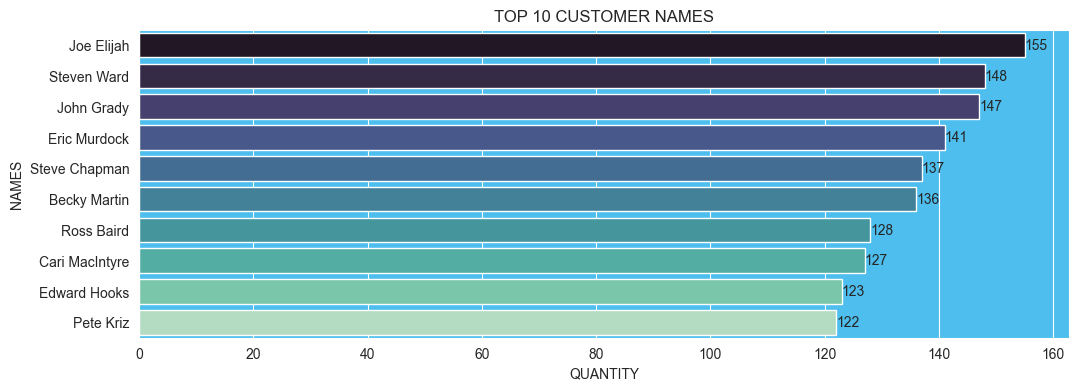

In [60]:
d=df[['Customer ID','Customer Name','Quantity']][df['Year']==2013]
ds=d.groupby(['Customer ID','Customer Name'],as_index=False)['Quantity'].sum()
ds=ds.nlargest(10,'Quantity', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Quantity',y='Customer Name',data=ds,palette="mako")
ax.set(ylabel='NAMES', xlabel='QUANTITY')
for bars in ax.containers:ax.bar_label(bars)
plt.title("TOP 10 CUSTOMER NAMES")
ax.set_facecolor("#4DBEEE")

# TOP 10 CUSTOMERS NAME - 2014

**MAXIMUM SALES**

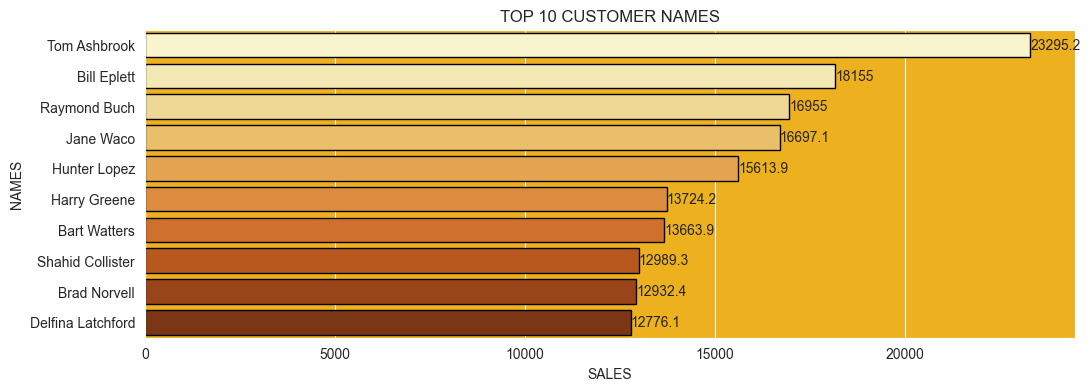

In [61]:
d=df[['Customer ID','Customer Name','Sales']][df['Year']==2014]
ds=d.groupby(['Customer ID','Customer Name'],as_index=False)['Sales'].sum()
ds=ds.nlargest(10,'Sales', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Sales',y='Customer Name',data=ds,palette="YlOrBr",edgecolor="black")
ax.set(ylabel='NAMES', xlabel='SALES')
for bars in ax.containers:ax.bar_label(bars)
plt.title("TOP 10 CUSTOMER NAMES")
ax.set_facecolor("#EDB120")

**MAXIMUM QUANTITY**

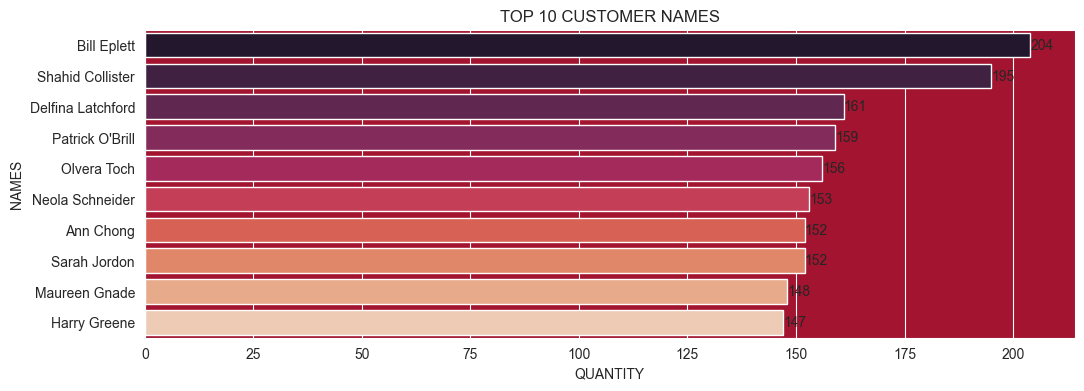

In [62]:
d=df[['Customer ID','Customer Name','Quantity']][df['Year']==2014]
ds=d.groupby(['Customer ID','Customer Name'],as_index=False)['Quantity'].sum()
ds=ds.nlargest(10,'Quantity', keep='all')
plt.figure(figsize=(12,4))
ax=sns.barplot(x='Quantity',y='Customer Name',data=ds,palette="rocket")
for bars in ax.containers:ax.bar_label(bars)
ax.set(ylabel='NAMES', xlabel='QUANTITY')
plt.title("TOP 10 CUSTOMER NAMES")
ax.set_facecolor("#A2142F")

In [63]:
df.to_csv('GlobalSuperStoreDataClean.csv')

# SUMMARY
- There are 51290 rows and 24 columns in the data set
- There are no null values
- Changed the datatype of date columns
- Created a seperate column for year and month
- Created a column for number of days an order takes to deliver
- The data set contains datas from 2011 to 2014 
- The total overall profit is 1467456.5500000003
- The total overall sales is 12642507.25
- The total quantity of Products Sold are 178312
- The maximum quantity of product a customer ordered is 14
- With the analysis we can see that the sales,quantity of product sold are increasing every year and hence the profit is also increasing
- With the monthly analysis we see that the sales are less during the starting months of the year and gradually inreases at the end of the year
- The max shipment were standard class mode
- The most orders were of office supplies
- Country, State, City wise sales,quantity and profit were analised
- Top products of sale and profit are listed
- Top customers names are listed - of each year